In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

df = pd.read_csv("data/data_finalized.csv")

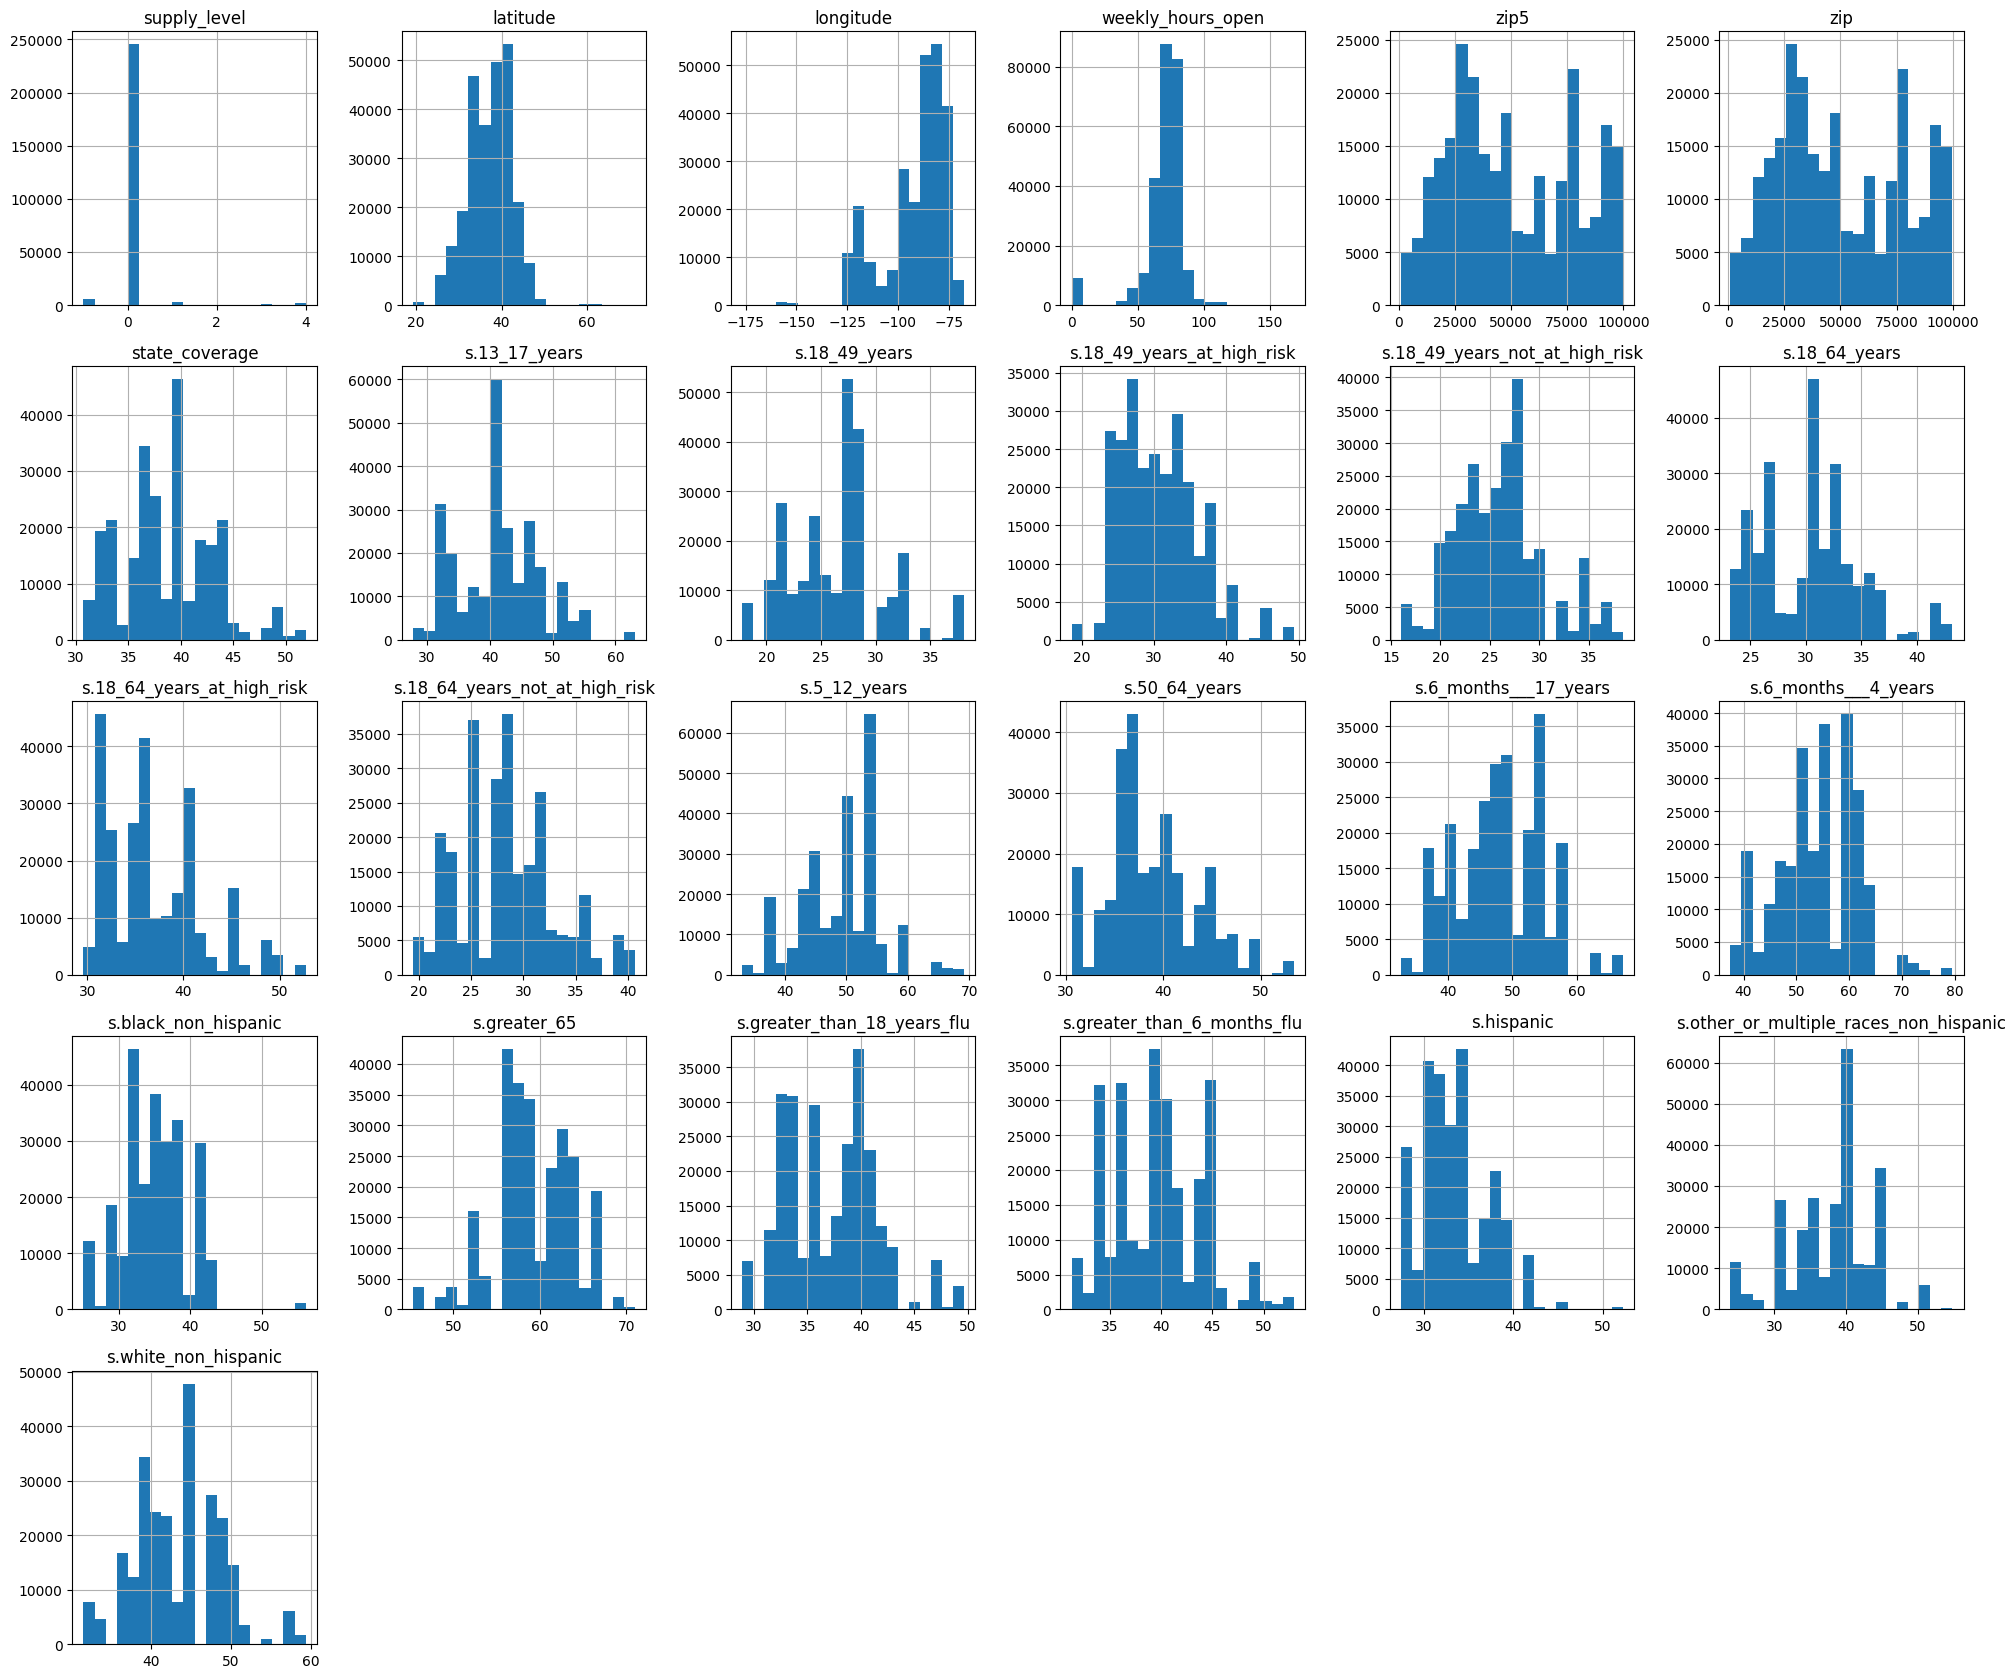

In [2]:
# Set of histograms for all numeric columns
numeric_cols = df.select_dtypes(include='number').columns
fig, axes = plt.subplots(6, 6, figsize=(20, 20))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    df[col].hist(ax=axes[i], bins=20)
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

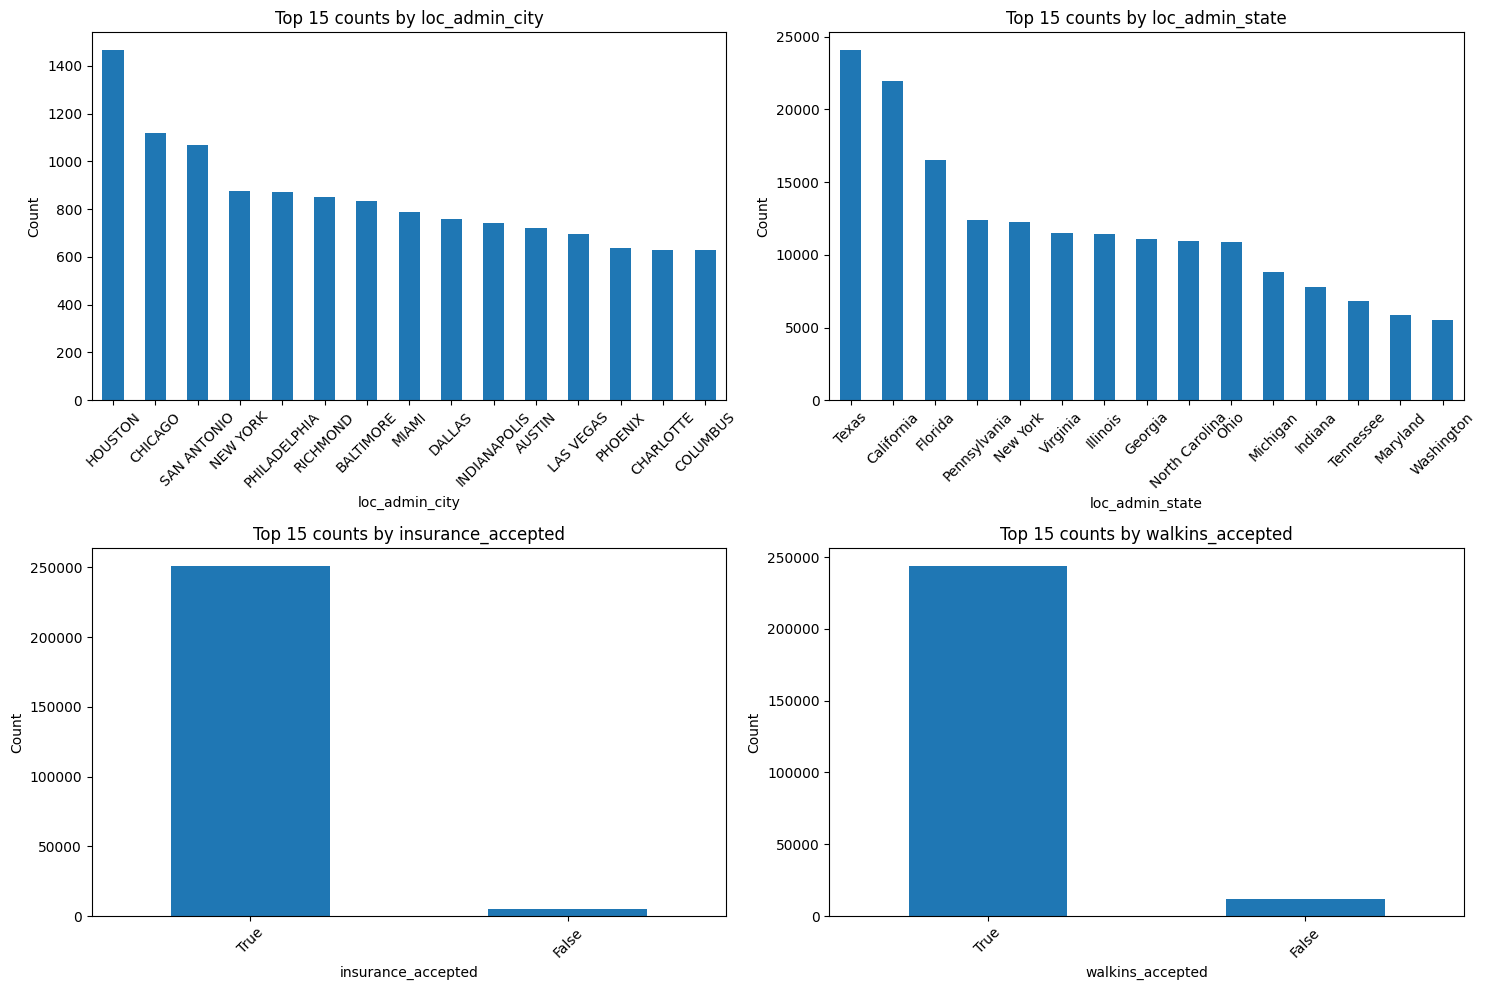

In [3]:
# Set of bar charts for all numeric columns
top_n = 15
columns = ['loc_admin_city', 'loc_admin_state', 'insurance_accepted', 'walkins_accepted']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(columns):
    df[col].value_counts().nlargest(top_n).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Top {top_n} counts by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## State Vaccination Count DF

In [4]:
#Creating dataframe for state calculations
coverage_cols = [
    'state_coverage', 's.13_17_years', 's.18_49_years', 's.18_49_years_at_high_risk',
    's.18_49_years_not_at_high_risk', 's.18_64_years', 's.18_64_years_at_high_risk',
    's.18_64_years_not_at_high_risk', 's.5_12_years', 's.50_64_years', 's.6_months___17_years',
    's.6_months___4_years', 's.black_non_hispanic', 's.greater_65', 's.greater_than_18_years_flu',
    's.greater_than_6_months_flu', 's.hispanic', 's.other_or_multiple_races_non_hispanic',
    's.white_non_hispanic'
]

state_vacc_count_df = df.groupby('loc_admin_state').agg(
    location_count = ('loc_admin_state', 'size'),
    **{col: (col, 'first') for col in coverage_cols}
).reset_index()

state_vacc_count_df

,loc_admin_state,location_count,state_coverage,s.13_17_years,s.18_49_years,s.18_49_years_at_high_risk,s.18_49_years_not_at_high_risk,s.18_64_years,s.18_64_years_at_high_risk,s.18_64_years_not_at_high_risk,...,s.50_64_years,s.6_months___17_years,s.6_months___4_years,s.black_non_hispanic,s.greater_65,s.greater_than_18_years_flu,s.greater_than_6_months_flu,s.hispanic,s.other_or_multiple_races_non_hispanic,s.white_non_hispanic
0,Alabama,4567,33.233333,38.2,22.6,26.6,21.8,26.0,31.5,24.1,...,33.7,39.9,37.5,34.5,52.1,32.4,34.0,36.2,30.6,34.2
1,Alaska,666,36.905556,34.6,28.9,44.9,25.4,31.3,44.5,27.2,...,37.0,39.6,46.9,36.5,50.6,35.1,36.2,31.5,35.7,37.4
2,Arizona,5446,36.000000,38.0,17.8,32.2,16.0,23.2,39.2,19.4,...,34.9,45.7,54.9,33.5,60.0,34.2,38.6,36.5,35.5,41.3
3,Arkansas,2210,35.194444,37.4,23.3,22.1,24.0,27.9,31.2,26.9,...,37.5,44.1,43.7,34.0,56.9,35.3,37.3,35.1,27.2,39.3
4,California,21939,39.983333,47.2,27.4,29.5,26.9,30.3,36.0,28.5,...,36.9,53.6,60.5,32.0,56.1,36.1,39.9,33.0,44.2,47.5
5,Colorado,5280,43.255556,48.0,30.1,31.0,30.0,35.0,40.6,33.5,...,47.0,55.1,63.9,38.2,63.3,41.0,43.9,34.2,41.0,48.3
6,Connecticut,1011,48.594444,55.8,34.8,38.7,34.4,38.5,42.9,37.5,...,45.6,67.1,79.6,37.7,63.8,44.8,49.3,37.7,42.2,55.1
7,Delaware,995,40.788889,45.4,27.0,30.3,26.2,31.7,34.2,30.9,...,40.1,52.6,62.0,35.4,63.9,41.2,43.5,30.9,34.1,50.2
8,Florida,16555,31.972222,32.6,21.5,23.3,21.4,24.5,31.4,22.5,...,30.6,36.9,39.9,28.6,56.1,33.7,34.3,30.5,30.8,38.9
9,Georgia,11081,33.150000,32.5,21.2,26.5,20.2,25.7,35.2,22.6,...,35.8,40.9,46.9,31.3,52.5,31.4,33.6,27.4,33.4,36.6


In [5]:
# State population data (2024)
state_populations = {
    'Alabama': 5108468,
    'Alaska': 733391,
    'Arizona': 7431344,
    'Arkansas': 3067732,
    'California': 38965193,
    'Colorado': 5877610,
    'Connecticut': 3617176,
    'Delaware': 1031890,
    'Florida': 23244842,
    'Georgia': 11145304,
    'Hawaii': 1435138,
    'Idaho': 1983637,
    'Illinois': 12549689,
    'Indiana': 6862199,
    'Iowa': 3207004,
    'Kansas': 2940546,
    'Kentucky': 4555777,
    'Louisiana': 4573749,
    'Maine': 1407006,
    'Maryland': 6164660,
    'Massachusetts': 7001399,
    'Michigan': 10037261,
    'Minnesota': 5759644,
    'Mississippi': 2940057,
    'Missouri': 6196367,
    'Montana': 1123989,
    'Nebraska': 1978379,
    'Nevada': 3194176,
    'New Hampshire': 1407006,
    'New Jersey': 9290841,
    'New Mexico': 2114371,
    'New York': 19336776,
    'North Carolina': 10835491,
    'North Dakota': 811044,
    'Ohio': 11785935,
    'Oklahoma': 4053824,
    'Oregon': 4233358,
    'Pennsylvania': 12972008,
    'Rhode Island': 1110822,
    'South Carolina': 5464570,
    'South Dakota': 908414,
    'Tennessee': 7126489,
    'Texas': 31398676,
    'Utah': 3454226,
    'Vermont': 647464,
    'Virginia': 8715698,
    'Washington': 7888151,
    'West Virginia': 1770071,
    'Wisconsin': 5910955,
    'Wyoming': 584057
}

state_vacc_count_df['population'] = state_vacc_count_df['loc_admin_state'].map(state_populations)
state_vacc_count_df['locations_per_1000'] = (state_vacc_count_df['location_count'] / state_vacc_count_df['population']) * 1000

## State Vaccination Rate Hypothesis Test

Analyzing 19 coverage metrics across 50 states

Coverage Metric                          | Correlation |  P-value  | Significant?
----------------------------------------|-------------|-----------|-------------
state_coverage                          |   -0.2841   |  0.045585 |    Yes  
s.13_17_years                           |   -0.2809   |  0.048133 |    Yes  
s.18_49_years                           |   -0.2628   |  0.065162 |    No   
s.18_49_years_at_high_risk              |   -0.3142   |  0.026275 |    Yes  
s.18_49_years_not_at_high_risk          |   -0.2131   |  0.137318 |    No   
s.18_64_years                           |   -0.2354   |  0.099869 |    No   
s.18_64_years_at_high_risk              |   -0.3407   |  0.015483 |    Yes  
s.18_64_years_not_at_high_risk          |   -0.2055   |  0.152322 |    No   
s.5_12_years                            |   -0.3499   |  0.012736 |    Yes  
s.50_64_years                           |   -0.2213   |  0.122498 |    No   
s.6_months___17_yea

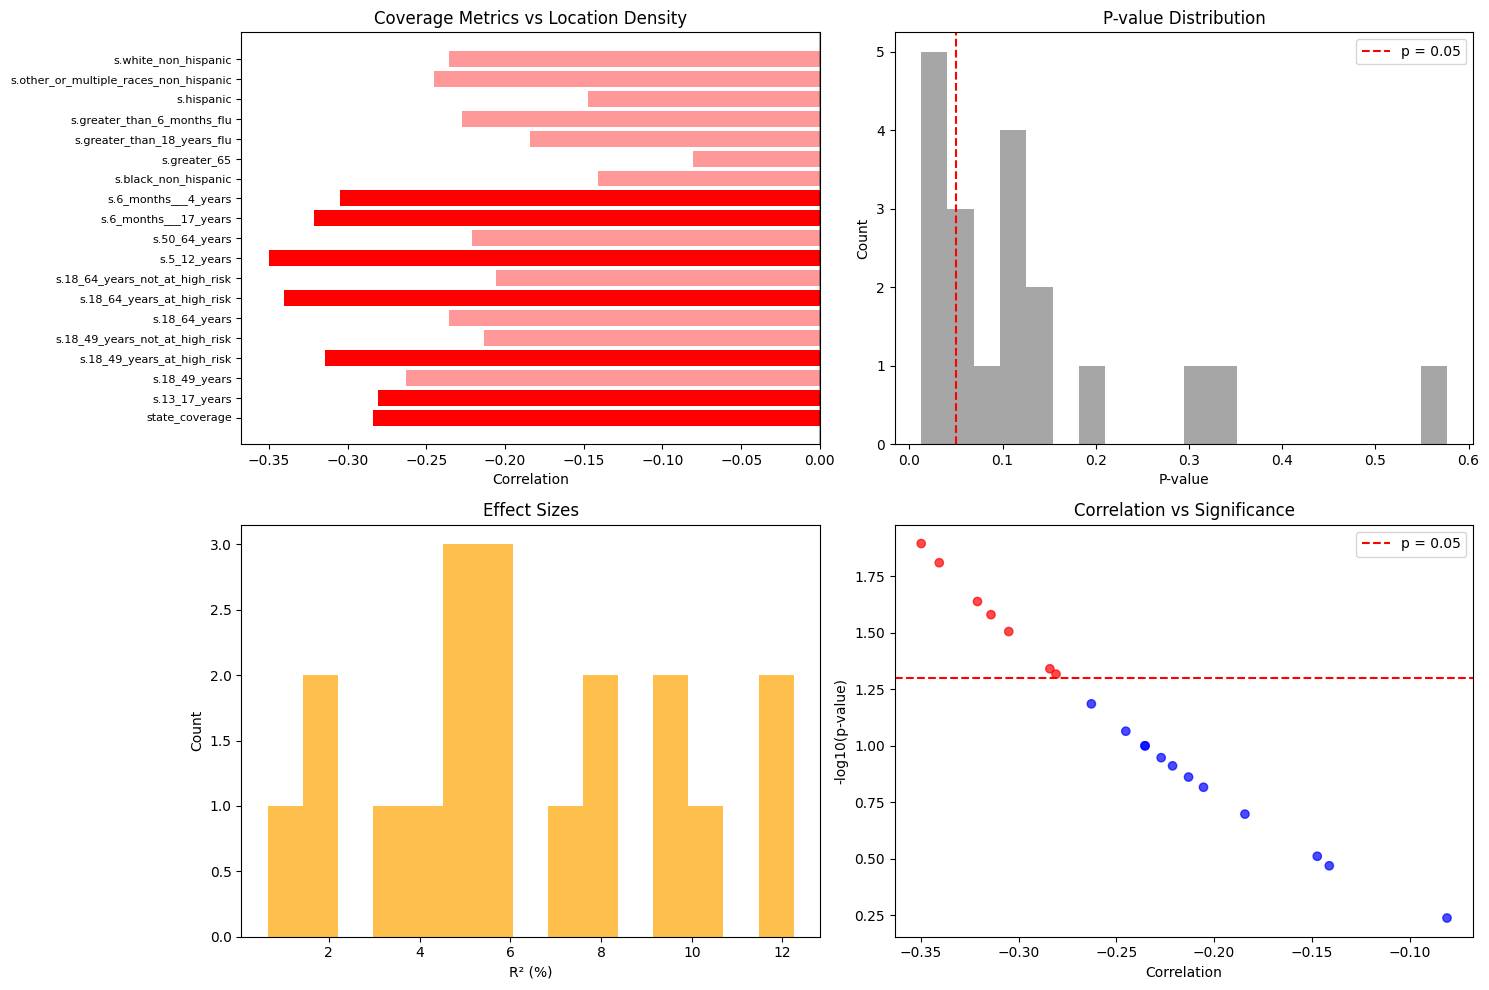


Results: 7 of 19 metrics show significant correlation with location density


In [6]:
# State Analysis: Coverage Metrics vs Location Density

# Get coverage columns
exclude_cols = ['loc_admin_state', 'location_count', 'population', 'locations_per_1000']
coverage_columns = [col for col in state_vacc_count_df.columns if col not in exclude_cols]

print(f"Analyzing {len(coverage_columns)} coverage metrics across {len(state_vacc_count_df)} states\n")

# Calculate correlations
results = []
locations_per_1000 = state_vacc_count_df['locations_per_1000']

print("Coverage Metric                          | Correlation |  P-value  | Significant?")
print("----------------------------------------|-------------|-----------|-------------")

for col in coverage_columns:
    coverage_data = state_vacc_count_df[col]
    valid_data = ~(locations_per_1000.isna() | coverage_data.isna())
    
    if valid_data.sum() < 10:
        print(f"{col:39s} |     N/A     |    N/A    |     N/A")
        continue
    
    r, p = pearsonr(locations_per_1000[valid_data], coverage_data[valid_data])
    
    results.append({
        'metric': col,
        'correlation': r,
        'p_value': p,
        'significant': p < 0.05,
        'n_states': valid_data.sum()
    })
    
    sig_marker = 'Yes' if p < 0.05 else 'No'
    print(f"{col:39s} |   {r:7.4f}   | {p:9.6f} |    {sig_marker:5s}")

results_df = pd.DataFrame(results)

# Summary stats
if len(results_df) > 0:
    print(f"\nSignificant correlations: {results_df['significant'].sum()}/{len(results_df)}")
    print(f"Mean correlation: {results_df['correlation'].mean():.4f}")
    
    # Top correlations
    print("\nStrongest positive correlations:")
    top_positive = results_df.nlargest(3, 'correlation')
    for _, row in top_positive.iterrows():
        sig_marker = "*" if row['significant'] else ""
        print(f"  {row['metric']:35s}: r = {row['correlation']:6.3f}{sig_marker}")
    
    print("\nStrongest negative correlations:")
    top_negative = results_df.nsmallest(3, 'correlation')
    for _, row in top_negative.iterrows():
        sig_marker = "*" if row['significant'] else ""
        print(f"  {row['metric']:35s}: r = {row['correlation']:6.3f}{sig_marker}")

# Visualization
if len(results_df) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Correlation plot
    correlations = results_df['correlation'].values
    colors = ['red' if r < 0 else 'blue' for r in correlations]
    sig_alpha = [1.0 if results_df.iloc[i]['significant'] else 0.4 for i in range(len(correlations))]
    
    y_pos = np.arange(len(correlations))
    bars = axes[0,0].barh(y_pos, correlations, color=colors, alpha=0.7)
    
    # Adjust alpha for significance
    for bar, alpha in zip(bars, sig_alpha):
        bar.set_alpha(alpha)
    
    axes[0,0].set_yticks(y_pos[::max(1, len(y_pos)//15)])
    axes[0,0].set_yticklabels([results_df.iloc[i]['metric'] for i in y_pos[::max(1, len(y_pos)//15)]], 
                              fontsize=8)
    axes[0,0].set_xlabel('Correlation')
    axes[0,0].set_title('Coverage Metrics vs Location Density')
    axes[0,0].axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # P-value histogram
    axes[0,1].hist(results_df['p_value'], bins=20, alpha=0.7, color='gray')
    axes[0,1].axvline(x=0.05, color='red', linestyle='--', label='p = 0.05')
    axes[0,1].set_xlabel('P-value')
    axes[0,1].set_ylabel('Count')
    axes[0,1].set_title('P-value Distribution')
    axes[0,1].legend()
    
    # Effect size histogram
    effect_sizes = (results_df['correlation'] ** 2) * 100
    axes[1,0].hist(effect_sizes, bins=15, alpha=0.7, color='orange')
    axes[1,0].set_xlabel('R² (%)')
    axes[1,0].set_ylabel('Count')
    axes[1,0].set_title('Effect Sizes')
    
    # Correlation vs significance
    scatter_colors = ['red' if s else 'blue' for s in results_df['significant']]
    axes[1,1].scatter(correlations, -np.log10(results_df['p_value']), c=scatter_colors, alpha=0.7)
    axes[1,1].axhline(y=-np.log10(0.05), color='red', linestyle='--', label='p = 0.05')
    axes[1,1].set_xlabel('Correlation')
    axes[1,1].set_ylabel('-log10(p-value)')
    axes[1,1].set_title('Correlation vs Significance')
    axes[1,1].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Final summary
    sig_count = results_df['significant'].sum()
    print(f"\nResults: {sig_count} of {len(results_df)} metrics show significant correlation with location density")

# Counties Df

I prepared this dataset separately for ease of use

In [7]:
county_df = pd.read_csv("data/avg_county_coverage.csv")

## County Vaccination Rate Hypothesis Test

Sample size: 1,369 counties

Coverage Metric              | Correlation | P-value | Significant?
----------------------------|-------------|---------|-------------
Overall Coverage            |     0.017   |  0.5179 |     No 
Adult Coverage (≥18)        |     0.014   |  0.6138 |     No 
Non-Medical Setting         |     0.015   |  0.5841 |     No 

Effect sizes: Overall: 0.0%, Adult: 0.0%, Non-Medical: 0.0%

Coverage metric correlations:
Overall vs Adult: r = 0.932, p = 0.0000
Overall vs Non-Medical: r = 0.642, p = 0.0000
Adult vs Non-Medical: r = 0.323, p = 0.0000


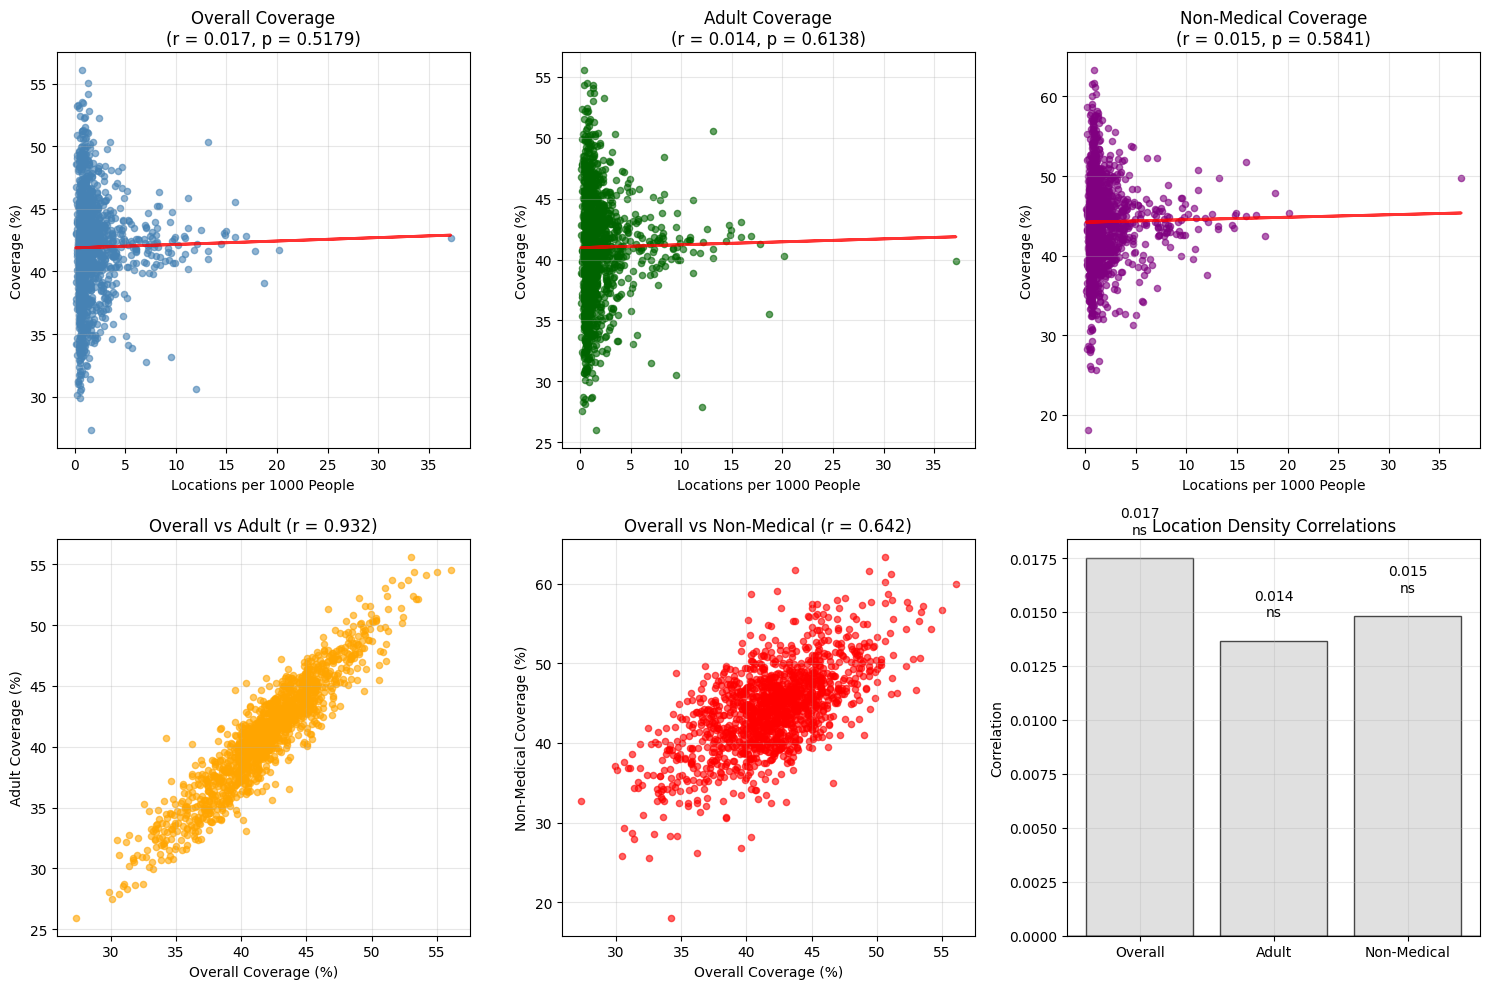


Results: 0 of 3 coverage metrics show significant correlation with location density


In [9]:
# County-level analysis: Multiple coverage metrics vs location density

locations_per_1000 = county_df['location_per_1000']
overall_coverage = county_df['coverage_estimate'] 
adult_coverage = county_df['>=18 Years']
nonmedical_coverage = county_df['Non-Medical Setting']

# Remove rows with missing data
complete_data = ~(locations_per_1000.isna() | overall_coverage.isna() | 
                  adult_coverage.isna() | nonmedical_coverage.isna())
n_complete = complete_data.sum()

print(f"Sample size: {n_complete:,} counties\n")

# Test correlations
print("Coverage Metric              | Correlation | P-value | Significant?")
print("----------------------------|-------------|---------|-------------")

# Overall coverage
r1, p1 = pearsonr(locations_per_1000[complete_data], overall_coverage[complete_data])
print(f"Overall Coverage            |    {r1:6.3f}   | {p1:7.4f} |     {'Yes' if p1<0.05 else 'No':3s}")

# Adult coverage  
r2, p2 = pearsonr(locations_per_1000[complete_data], adult_coverage[complete_data])
print(f"Adult Coverage (≥18)        |    {r2:6.3f}   | {p2:7.4f} |     {'Yes' if p2<0.05 else 'No':3s}")

# Non-medical coverage
r3, p3 = pearsonr(locations_per_1000[complete_data], nonmedical_coverage[complete_data])
print(f"Non-Medical Setting         |    {r3:6.3f}   | {p3:7.4f} |     {'Yes' if p3<0.05 else 'No':3s}")

print(f"\nEffect sizes: Overall: {r1**2*100:.1f}%, Adult: {r2**2*100:.1f}%, Non-Medical: {r3**2*100:.1f}%")

# Coverage metric relationships
print("\nCoverage metric correlations:")
r_oa, p_oa = pearsonr(overall_coverage[complete_data], adult_coverage[complete_data])
r_on, p_on = pearsonr(overall_coverage[complete_data], nonmedical_coverage[complete_data])
r_an, p_an = pearsonr(adult_coverage[complete_data], nonmedical_coverage[complete_data])

print(f"Overall vs Adult: r = {r_oa:.3f}, p = {p_oa:.4f}")
print(f"Overall vs Non-Medical: r = {r_on:.3f}, p = {p_on:.4f}")
print(f"Adult vs Non-Medical: r = {r_an:.3f}, p = {p_an:.4f}")

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Location density vs coverage plots
coverage_data = [
    (overall_coverage, 'Overall Coverage', 'steelblue', r1, p1),
    (adult_coverage, 'Adult Coverage', 'darkgreen', r2, p2),
    (nonmedical_coverage, 'Non-Medical Coverage', 'purple', r3, p3)
]

for i, (coverage, title, color, r, p) in enumerate(coverage_data):
    axes[0,i].scatter(locations_per_1000[complete_data], coverage[complete_data], 
                      alpha=0.6, s=20, color=color)
    
    # Fit line
    z = np.polyfit(locations_per_1000[complete_data], coverage[complete_data], 1)
    p_line = np.poly1d(z)
    axes[0,i].plot(locations_per_1000[complete_data], p_line(locations_per_1000[complete_data]), 
                   "r-", alpha=0.8, linewidth=2)
    
    axes[0,i].set_xlabel('Locations per 1000 People')
    axes[0,i].set_ylabel('Coverage (%)')
    axes[0,i].set_title(f'{title}\n(r = {r:.3f}, p = {p:.4f})')
    axes[0,i].grid(True, alpha=0.3)

# Coverage comparison plots
axes[1,0].scatter(overall_coverage[complete_data], adult_coverage[complete_data], 
                  alpha=0.6, s=20, color='orange')
axes[1,0].set_xlabel('Overall Coverage (%)')
axes[1,0].set_ylabel('Adult Coverage (%)')
axes[1,0].set_title(f'Overall vs Adult (r = {r_oa:.3f})')
axes[1,0].grid(True, alpha=0.3)

axes[1,1].scatter(overall_coverage[complete_data], nonmedical_coverage[complete_data], 
                  alpha=0.6, s=20, color='red')
axes[1,1].set_xlabel('Overall Coverage (%)')
axes[1,1].set_ylabel('Non-Medical Coverage (%)')
axes[1,1].set_title(f'Overall vs Non-Medical (r = {r_on:.3f})')
axes[1,1].grid(True, alpha=0.3)

# Summary bar chart
metrics = ['Overall', 'Adult', 'Non-Medical']
correlations = [r1, r2, r3]
p_values = [p1, p2, p3]

colors = ['steelblue' if p < 0.05 else 'lightgray' for p in p_values]
bars = axes[1,2].bar(metrics, correlations, color=colors, alpha=0.7, edgecolor='black')

for i, (bar, p_val) in enumerate(zip(bars, p_values)):
    height = bar.get_height()
    sig_marker = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else 'ns'
    axes[1,2].text(bar.get_x() + bar.get_width()/2., height + 0.001,
                   f'{correlations[i]:.3f}\n{sig_marker}',
                   ha='center', va='bottom', fontsize=10)

axes[1,2].set_ylabel('Correlation')
axes[1,2].set_title('Location Density Correlations')
axes[1,2].grid(True, alpha=0.3)
axes[1,2].axhline(y=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

# Summary
significant_tests = sum([p1 < 0.05, p2 < 0.05, p3 < 0.05])
print(f"\nResults: {significant_tests} of 3 coverage metrics show significant correlation with location density")